In [1]:
# Dependencies
from citipy import citipy as ct
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.stats as sts
from config import weather_key

In [2]:
# Get list of all unique cities available through citipy
coords = list(ct.WORLD_CITIES_DICT.keys())
city_list = list(set([ct.nearest_city(coords[index][0],coords[index][1]).city_name for index in range(len(coords))]))

In [3]:
# create weather dataframe
weather_data = pd.DataFrame(columns=['city','lng','lat','temp','hum','cld','wnd'])

# loop through a random sample of 650 cities and store weather information in dataframe
# some cities not available in weather api, so sample of 650 is used to compansate and get at least 500 in the dataframe
for city in random.sample(city_list,650):
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&units=imperial&appid={weather_key}"
    response = requests.get(url).json()
    try:
        weather_data = weather_data.append({'city': city, 
                                        'lng': response['coord']['lon'],
                                        'lat': response['coord']['lat'], 
                                        'temp': response['main']['temp'],
                                        'hum': response['main']['humidity'],
                                        'cld': response['clouds']['all'],
                                        'wnd': response['wind']['speed']},ignore_index=True)
    except KeyError:
        # annotate which cities were skipped over
        print(f"No weather information found for city: {city}")

# confirm number of cities in final dataframe
print(f"Samples pulled: {len(weather_data)}")

# Save to csv
weather_data.to_csv(path_or_buf='Output/weather_data.csv',index=False)

weather_data.head()

No weather information found for city: kozakai
No weather information found for city: we
No weather information found for city: odemis
No weather information found for city: delogozdi
No weather information found for city: panugnawan
No weather information found for city: visimo-utkinsk
No weather information found for city: athira
No weather information found for city: mankovo-kalitvenskoye
No weather information found for city: mangalcal
No weather information found for city: quyquyho
No weather information found for city: ybytimi
No weather information found for city: tepecoacuilco
No weather information found for city: kailasahar
No weather information found for city: chimalhuacan
No weather information found for city: angamacutiro
No weather information found for city: ig
No weather information found for city: rolim de moura
No weather information found for city: neon rision
No weather information found for city: ghamarwin
No weather information found for city: kinanah
No weather 

,city,lng,lat,temp,hum,cld,wnd
0,songwa,33.5167,-3.5167,69.24,82,97,4.72
1,palmar de bravo,-97.5667,18.8333,57.97,76,74,5.59
2,pizarro,-77.3660,4.9533,77.04,90,100,5.66
3,tielt,3.3672,51.0037,38.70,99,0,3.00
4,fukuma,130.4667,33.7667,67.33,21,0,11.50


In [4]:
# clean datatype for the two columns
weather_data[['hum','cld']] = weather_data[['hum','cld']].astype(float)

# set up dataframes for northern hemisphere and southern hemisphere
n_hemi = weather_data.loc[weather_data.lat>=0]
s_hemi = weather_data.loc[weather_data.lat<0]

# Save to csv
n_hemi.to_csv(path_or_buf='Output/n_hemi_weather.csv',index=False)
s_hemi.to_csv(path_or_buf='Output/s_hemi_weather.csv',index=False)

## Temperature

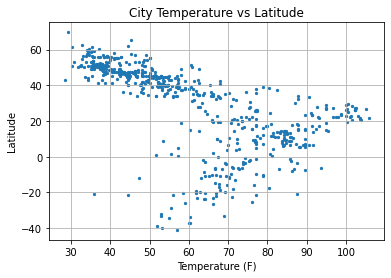

This plot illustrates the relationship between a city's latitude (a measure of distance from the equator) and the current temperature. Data taken 4-25-21


In [8]:
# set up basic scatter plot
plt.scatter(weather_data.temp,weather_data.lat,s=5)
plt.title('City Temperature vs Latitude')
plt.xlabel('Temperature (F)')
plt.ylabel('Latitude')
plt.grid()

# save as png
plt.savefig('Output/temp_v_lat_scatter.png')

plt.show()

print("This plot illustrates the relationship between a city's latitude \
(a measure of distance from the equator) and the current temperature. Data taken 4-25-21")

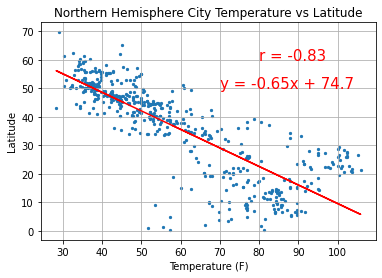

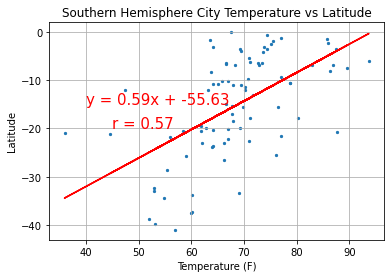

In [9]:
# plot Southern hemisphere linear regression and annotate relevant information
(slope,intercept,r,p,stderr) = sts.linregress(n_hemi.temp,n_hemi.lat)
reg_line = slope*n_hemi.temp + intercept
eq_line = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.plot(n_hemi.temp,reg_line,color='r')
plt.annotate(eq_line,(70,50),color='r',fontsize=15)
plt.annotate(f"r = {round(r,2)}",(80,60),color='r',fontsize=15)

# overlay northern hemisphere scatter plot
plt.scatter(n_hemi.temp,n_hemi.lat,s=5)
plt.title('Northern Hemisphere City Temperature vs Latitude')
plt.xlabel('Temperature (F)')
plt.ylabel('Latitude')
plt.grid()
plt.savefig('Output/n_hemi_temp_regress.png')
plt.show()

# plot southern hemisphere linear regression and annotate relevant information
(slope,intercept,r,p,stderr) = sts.linregress(s_hemi.temp,s_hemi.lat)
reg_line = slope*s_hemi.temp + intercept
eq_line = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.plot(s_hemi.temp,reg_line,color='r')
plt.annotate(eq_line,(40,-15),color='r',fontsize=15)
plt.annotate(f"r = {round(r,2)}",(45,-20),color='r',fontsize=15)

# overlay southern hemisphere scatter plot
plt.scatter(s_hemi.temp,s_hemi.lat,s=5)
plt.title('Southern Hemisphere City Temperature vs Latitude')
plt.xlabel('Temperature (F)')
plt.ylabel('Latitude')
plt.grid()
plt.savefig('Output/s_hemi_temp_regress.png')
plt.show()

The linear regression reveals that in the northern hemisphere there is a moderate correlation (r = -0.86, subject to change depending on sample) between temperature and distance ot the equator. The closer a city is, the more likely it is to have higher temperatures.

Interestingly enough, the correlation is not as strong in the southern hemisphere (r = 0.48, subject to change). There could be a number of reasons why this is so. For one, the sample size is noticeably smaller in the southern hemisphere. the correlation may change and become stronger if there is a larger sample size in the southern hemisphere.

## Humidity

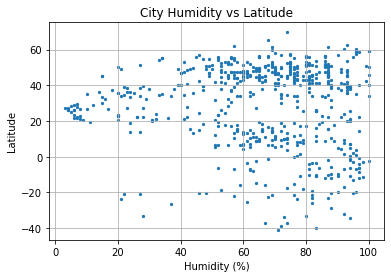

This plot illustrates the relationship between a city's latitude (a measure of distance from the equator) and the current humidity. Data taken 4-25-21


In [10]:
plt.scatter(weather_data.hum,weather_data.lat,s=5)
plt.title('City Humidity vs Latitude')
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.grid()
plt.savefig('Output/hum_v_lat_scatter.png')
plt.show()

print("This plot illustrates the relationship between a city's latitude \
(a measure of distance from the equator) and the current humidity. Data taken 4-25-21")

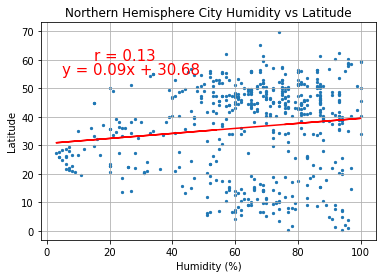

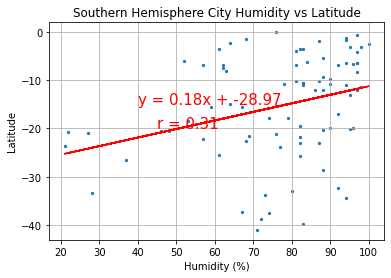

In [11]:
(slope,intercept,r,p,stderr) = sts.linregress(n_hemi.hum,n_hemi.lat)
reg_line = slope*n_hemi.hum + intercept
eq_line = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.plot(n_hemi.hum,reg_line,color='r')
plt.annotate(eq_line,(5,55),color='r',fontsize=15)
plt.annotate(f"r = {round(r,2)}",(15,60),color='r',fontsize=15)

plt.scatter(n_hemi.hum,n_hemi.lat,s=5)
plt.title('Northern Hemisphere City Humidity vs Latitude')
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.grid()
plt.savefig('Output/n_hemi_hum_regress.png')
plt.show()

(slope,intercept,r,p,stderr) = sts.linregress(s_hemi.hum,s_hemi.lat)
reg_line = slope*s_hemi.hum + intercept
eq_line = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.plot(s_hemi.hum,reg_line,color='r')
plt.annotate(eq_line,(40,-15),color='r',fontsize=15)
plt.annotate(f"r = {round(r,2)}",(45,-20),color='r',fontsize=15)

plt.scatter(s_hemi.hum,s_hemi.lat,s=5)
plt.title('Southern Hemisphere City Humidity vs Latitude')
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.grid()
plt.savefig('Output/s_hemi_hum_regress.png')
plt.show()

There are weak correlations between humidity and latitude in both the northern and southern hemispheres (r < 0.4 for both). This illustrates that humidity is minimally affected by distance to the equator. More local factors are likely to be the main driving forces behind humidity level.

## Cloudiness

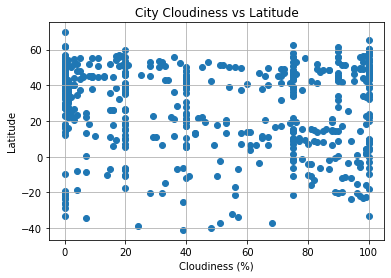

This plot illustrates the relationship between a city's latitude (a measure of distance from the equator) and the current cloudiness. Data taken 4-25-21


In [12]:
plt.scatter(weather_data.cld,weather_data.lat)
plt.title('City Cloudiness vs Latitude')
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.grid()
plt.savefig('Output/cloud_v_lat_scatter.png')
plt.show()

print("This plot illustrates the relationship between a city's latitude \
(a measure of distance from the equator) and the current cloudiness. Data taken 4-25-21")

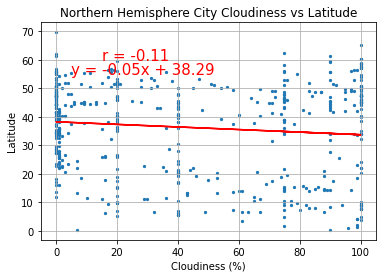

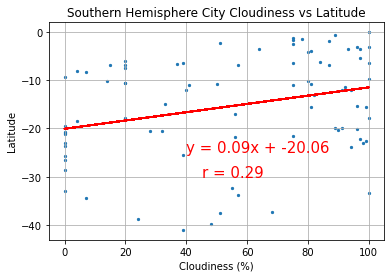

In [13]:
(slope,intercept,r,p,stderr) = sts.linregress(n_hemi.cld,n_hemi.lat)
reg_line = slope*n_hemi.cld + intercept
eq_line = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.plot(n_hemi.cld,reg_line,color='r')
plt.annotate(eq_line,(5,55),color='r',fontsize=15)
plt.annotate(f"r = {round(r,2)}",(15,60),color='r',fontsize=15)

plt.scatter(n_hemi.cld,n_hemi.lat,s=5)
plt.title('Northern Hemisphere City Cloudiness vs Latitude')
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.grid()
plt.savefig('Output/n_hemi_cloud_regress.png')
plt.show()

(slope,intercept,r,p,stderr) = sts.linregress(s_hemi.cld,s_hemi.lat)
reg_line = slope*s_hemi.cld + intercept
eq_line = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.plot(s_hemi.cld,reg_line,color='r')
plt.annotate(eq_line,(40,-25),color='r',fontsize=15)
plt.annotate(f"r = {round(r,2)}",(45,-30),color='r',fontsize=15)

plt.scatter(s_hemi.cld,s_hemi.lat,s=5)
plt.title('Southern Hemisphere City Cloudiness vs Latitude')
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.grid()
plt.savefig('Output/s_hemi_cloud_regress.png')
plt.show()

In the northern hemisphere, there is almost no correlation between cloudiness and distance to the equator (r = 0.01). of note, however, is that on the southern hemisphere the r value is much higher, at r>0.40, although still not high enough to say there is a decent correlation.

## Wind Speed

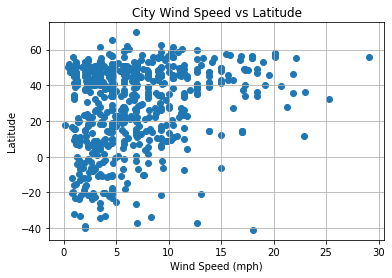

This plot illustrates the relationship between a city's latitude (a measure of distance from the equator) and the current Wind Speed. Data taken 4-25-21


In [14]:
plt.scatter(weather_data.wnd,weather_data.lat)
plt.title('City Wind Speed vs Latitude')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.grid()
plt.savefig('Output/ws_v_lat_scatter.png')
plt.show()

print("This plot illustrates the relationship between a city's latitude \
(a measure of distance from the equator) and the current Wind Speed. Data taken 4-25-21")

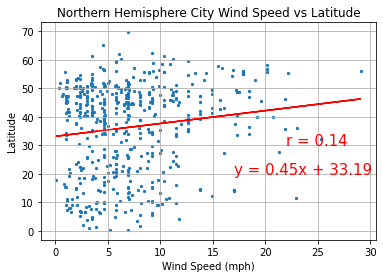

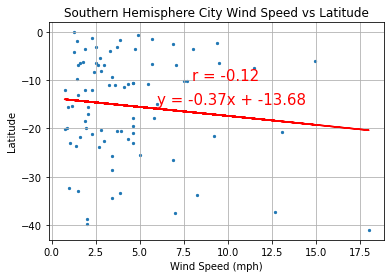

In [15]:
(slope,intercept,r,p,stderr) = sts.linregress(n_hemi.wnd,n_hemi.lat)
reg_line = slope*n_hemi.wnd + intercept
eq_line = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.plot(n_hemi.wnd,reg_line,color='r')
plt.annotate(eq_line,(17,20),color='r',fontsize=15)
plt.annotate(f"r = {round(r,2)}",(22,30),color='r',fontsize=15)

plt.scatter(n_hemi.wnd,n_hemi.lat,s=5)
plt.title('Northern Hemisphere City Wind Speed vs Latitude')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.grid()
plt.savefig('Output/n_hemi_ws_regress.png')
plt.show()

(slope,intercept,r,p,stderr) = sts.linregress(s_hemi.wnd,s_hemi.lat)
reg_line = slope*s_hemi.wnd + intercept
eq_line = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.plot(s_hemi.wnd,reg_line,color='r')
plt.annotate(eq_line,(6,-15),color='r',fontsize=15)
plt.annotate(f"r = {round(r,2)}",(8,-10),color='r',fontsize=15)

plt.scatter(s_hemi.wnd,s_hemi.lat,s=5)
plt.title('Southern Hemisphere City Wind Speed vs Latitude')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.grid()
plt.savefig('Output/s_hemi_ws_regress.png')
plt.show()

In both hemispheres, wind speed does not seem to be affected by distance to the equator as both r values are low (r < 0.25). As such, Latitude is not a good indicator of wind speed, and vice versa.